In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
pd.set_option("display.width", 1000)

In [2]:
bs_df = pd.read_csv("C:/Users/emirh/Downloads/full_data.csv")

In [ ]:
path="C:/Users/emirh/Downloads/full_data.csv"

In [11]:
bs_df.columns = bs_df.columns.str.lower()
discrete = [var for var in bs_df.columns if bs_df[var].dtype!="O" and bs_df[var].nunique()<10]
continuous = [var for var in bs_df.columns if bs_df[var].dtype!="O" and var!="stroke" and var not in discrete ]
categorical = [var for var in bs_df.columns if bs_df[var].dtype=="O"]
mixed_var = discrete + categorical
    

In [67]:
class DataOperation:
    
    def __init__(self,df):
        self.df=df
        
    def data_preview(self):

        print(self.df.head())
        print("*"*40)
        print(f"Shape of data: {self.df.shape}")
        print("*"*40)
        print(self.df.info())
        print("*"*40)
        print(self.df.describe().T)

    def data_summary(self):
        global discrete,continuous,categorical,mixed_var
        
        cardinality = self.df[categorical].nunique()

        print(f"Total Discrete Variables: {len(discrete)} --> {discrete}")
        print(f"Total Continuous Variables: {len(continuous)} --> {continuous}")
        print(f"Total Categorical Variables: {len(categorical)} --> {categorical}")
        print("*"*40)
        print(f"Cardinality: \n{cardinality}")
        for col in self.df[mixed_var]:
            print("*"*40)
            print(f"Counts of unique values for variables:\n{col} \n{self.df[col].value_counts()}")

    def missing_values_analysis(self):
        
        if self.df.isnull().sum().any():
            missing_percent = self.df.isnull().sum()/len(self.df)*100
            missing_total = self.df.isnull().sum()
            missing_table = pd.concat([missing_total,missing_percent],axis=1)
            missing_table.rename(columns={0:"Missing Value",1:"% of Total Value"},inplace=True)
            missing_table.sort_values(by="% of Total Value",ascending=False).round(1)
        else:
            print("There is no missing value.")

    def numerical_viz(self):
        global continuous

        for col in self.df[continuous]:
            
            fig, ax = plt.subplots(1, 2, sharex=True,figsize=(10, 4))

            sns.histplot(x=self.df[col],ax=ax[0],kde=True).set(title=f"Distribution of {col}")
            sns.boxplot(x=self.df[col],ax=ax[1]).set(title=f"Box-plot of {col}")
            sns.despine(left=True)
            
            plt.show() 
              
    def mixed_viz(self):
        global mixed_var
        
        for col in self.df[mixed_var]:
            fig = plt.figure(figsize=(10,4))
            
            sns.countplot(x=self.df[col]).set(title=f"Countplot of {col}")
            sns.despine()
            plt.show()

    def outlier_thresholds(self,var):
        q_1 = self.df[var].quantile(0.05)
        q_3 = self.df[var].quantile(0.95)
        ıq_r = q_3 - q_1
        up_limit = q_3 + 1.5 * ıq_r
        low_limit = q_1 - 1.5 * ıq_r

        return up_limit,low_limit     

In [68]:
bs_op = DataOperation(bs_df)
#bs_op.data_preview()

In [69]:
bs_op.data_summary()

Total Discrete Variables: 3 --> ['hypertension', 'heart_disease', 'stroke']
Total Continuous Variables: 3 --> ['age', 'avg_glucose_level', 'bmi']
Total Categorical Variables: 5 --> ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
****************************************
Cardinality: 
gender            2
ever_married      2
work_type         4
residence_type    2
smoking_status    4
dtype: int64
****************************************
Counts of unique values for variables:
hypertension 
0    4502
1     479
Name: hypertension, dtype: int64
****************************************
Counts of unique values for variables:
heart_disease 
0    4706
1     275
Name: heart_disease, dtype: int64
****************************************
Counts of unique values for variables:
stroke 
0    4733
1     248
Name: stroke, dtype: int64
****************************************
Counts of unique values for variables:
gender 
Female    2907
Male      2074
Name: gender, dtype: int64

In [70]:
bs_op.missing_values_analysis()

There is no missing value.


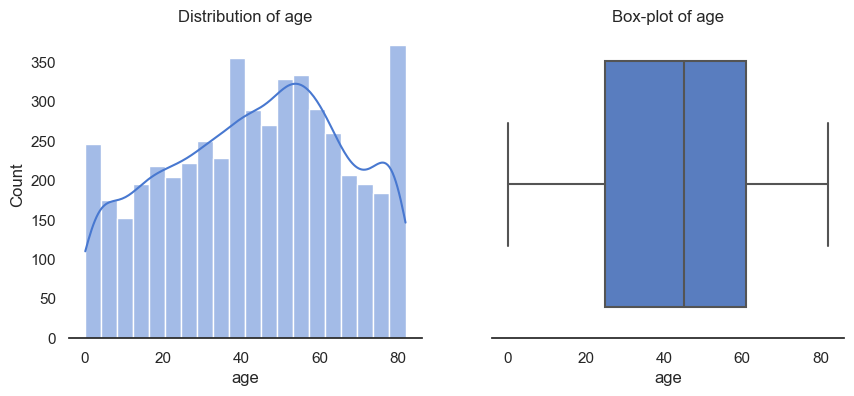

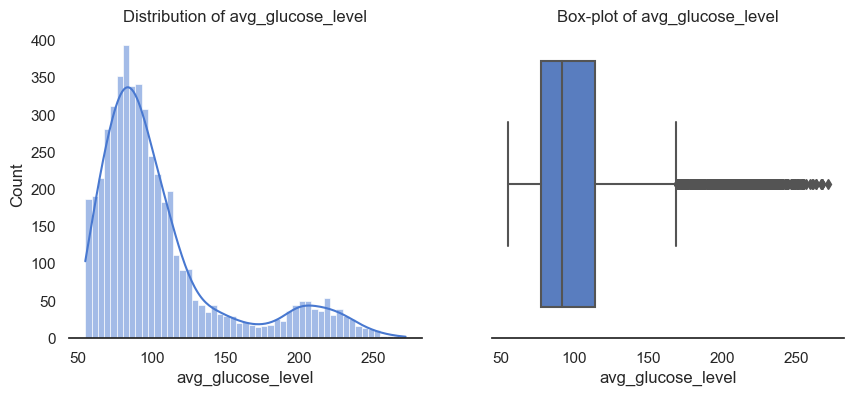

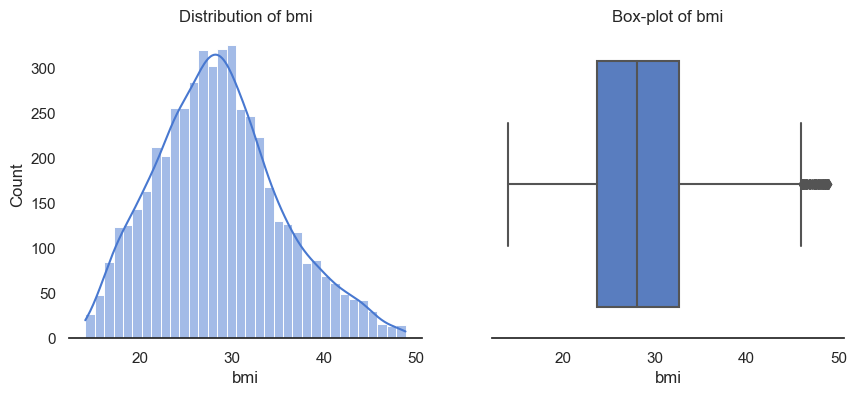

In [73]:
bs_op.numerical_viz()

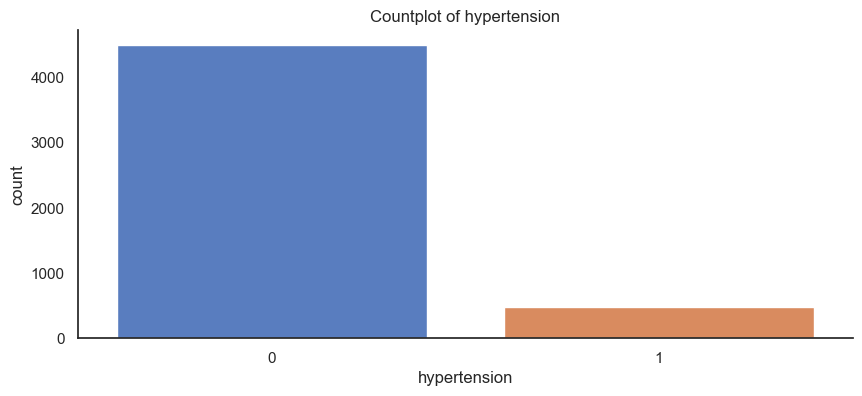

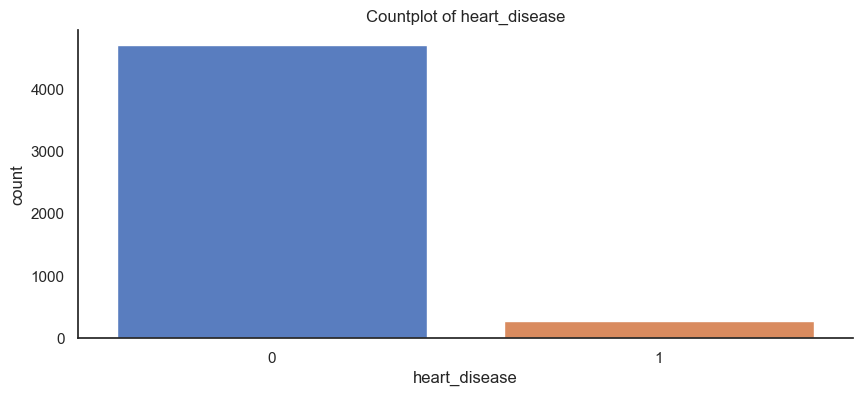

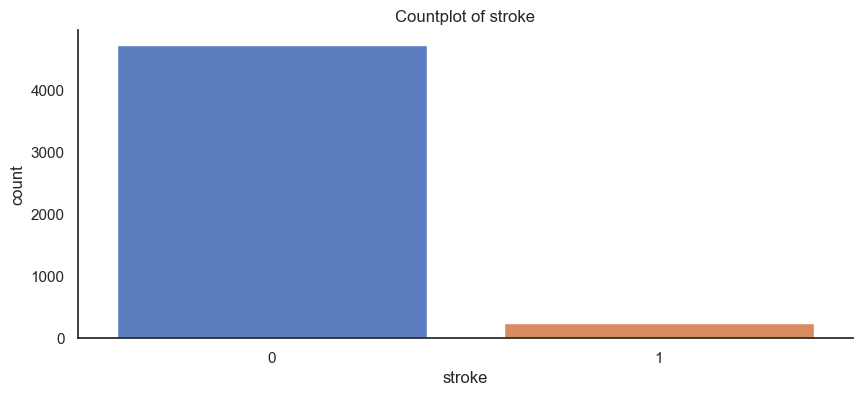

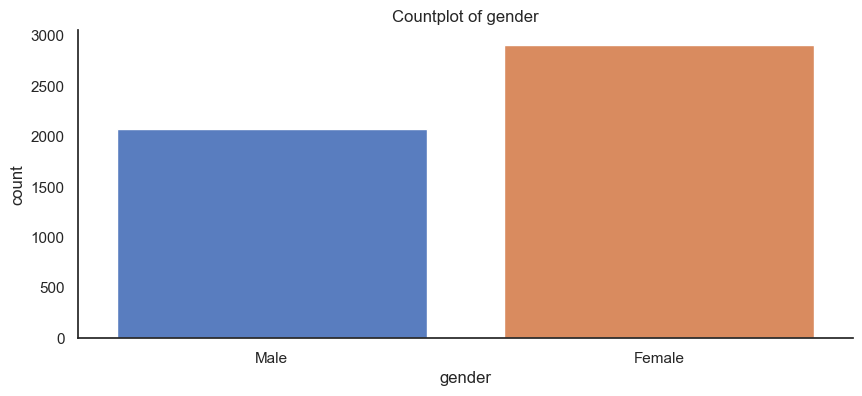

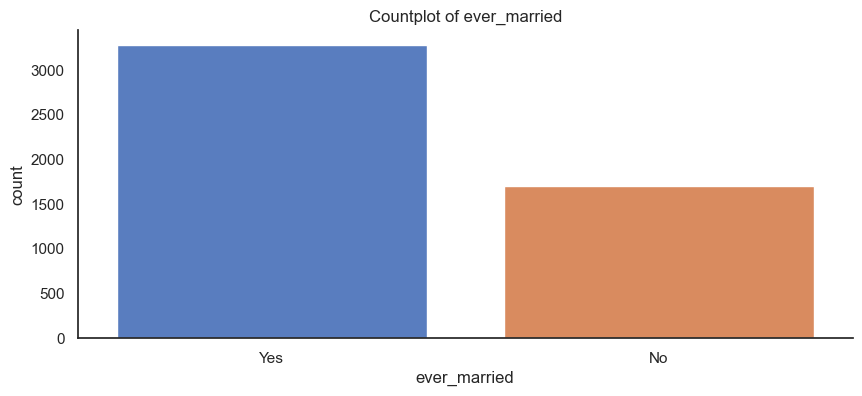

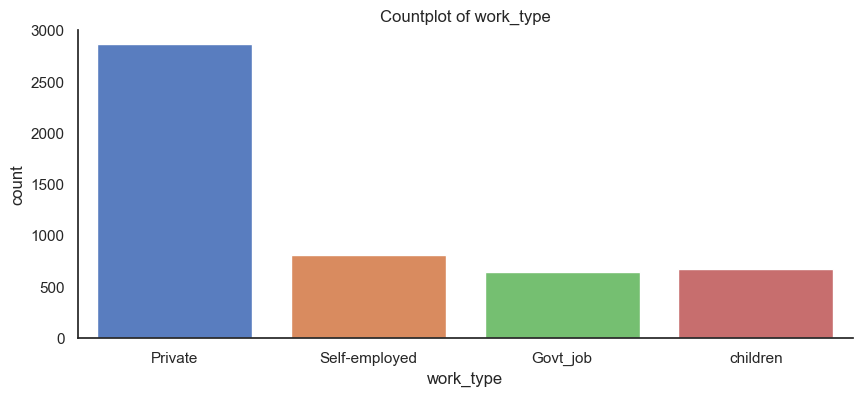

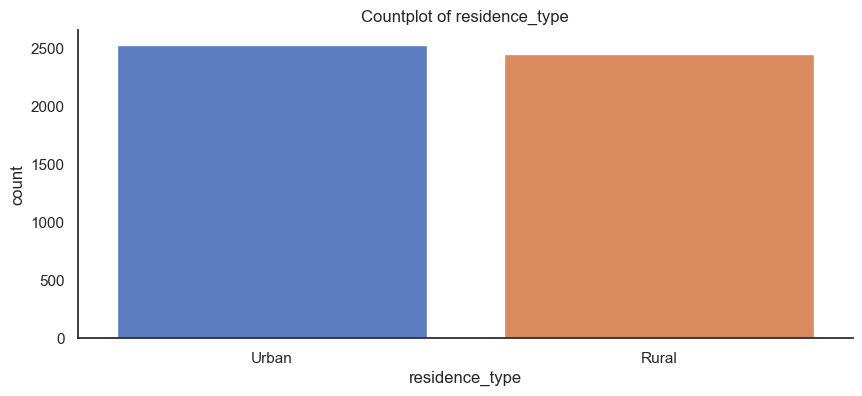

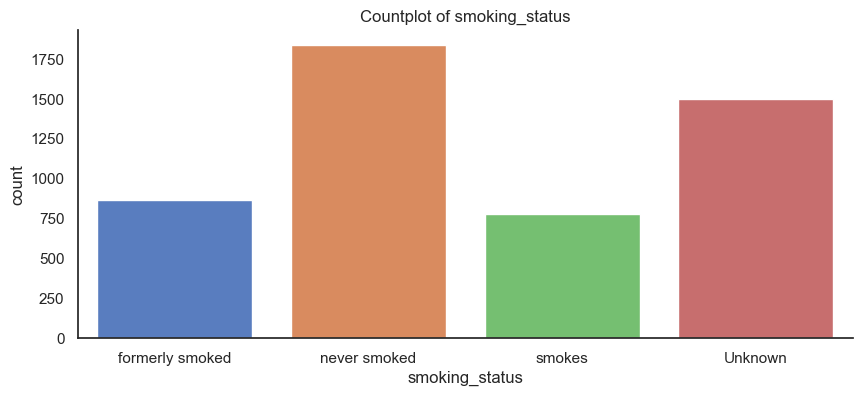

In [72]:
bs_op.mixed_viz()